In [1]:
# IMF MCMCO Test Question 5
# Natural Language Processing in Python: Supervised Machine Learning 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import RobertaTokenizer, RobertaModel
import torch


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/miniconda3/lib/python3.9/site

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/miniconda3/lib/python3.9/site

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/miniconda3/lib/python3.9/site

In [2]:
data = pd.read_csv('Labeled sentences.csv', encoding='latin1')
data.columns = data.columns.str.strip()

# Training data
inflation_samples = data[data['label'] == 'inflation'].sample(12, random_state=42)
exchange_rate_samples = data[data['label'] == 'exchange rate'].sample(12, random_state=42)
training_data = pd.concat([inflation_samples, exchange_rate_samples])

In [3]:
training_data.head()

,sentence,label
99,to ensure that inflation returns to target,inflation
69,Given this pick-up in activity and inflation,inflation
37,June CPI inflation was in line with expectations,inflation
55,In view of the underlying inflation pressures...,inflation
192,The decline in inflation was largely a result ...,inflation


In [4]:
# Testing data
test_data = data[~data.index.isin(training_data.index)].reset_index(drop=True)

In [5]:
test_data.head()

,sentence,label
0,"As yet, there had been little sign of the dimi...",inflation
1,Annual CPI inflation had been unchanged in Jun...,inflation
2,CPI inflation had fallen to 2.4% in June.,inflation
3,But the size and timing of any effect at the r...,inflation
4,the evolution of inflation expectations.,inflation


In [6]:
# Prepare training data
X_train = training_data['sentence'].values
y_train = training_data['label'].values

# Prepare test data
X_test = test_data['sentence'].values
y_test = test_data['label'].values


In [8]:
# Text processing with RoBERTa
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
X_train_processed = [" ".join(tokenizer.tokenize(text)) for text in X_train]
X_test_processed = [" ".join(tokenizer.tokenize(text)) for text in X_test]

In [9]:
# Vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_processed)
X_test_vectorized = vectorizer.transform(X_test_processed)


In [10]:
# Train a classifier
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [11]:
# Predictions
predictions = model.predict(X_test_vectorized)

In [12]:
# Classification report
report = classification_report(y_test, predictions, target_names=['inflation', 'exchange rate'], output_dict=True)
print(report)

{'inflation': {'precision': 0.9857142857142858, 'recall': 0.92, 'f1-score': 0.9517241379310346, 'support': 75.0}, 'exchange rate': {'precision': 0.9516129032258065, 'recall': 0.9915966386554622, 'f1-score': 0.9711934156378601, 'support': 119.0}, 'accuracy': 0.9639175257731959, 'macro avg': {'precision': 0.9686635944700461, 'recall': 0.9557983193277311, 'f1-score': 0.9614587767844474, 'support': 194.0}, 'weighted avg': {'precision': 0.9647964273837238, 'recall': 0.9639175257731959, 'f1-score': 0.963666633019242, 'support': 194.0}}


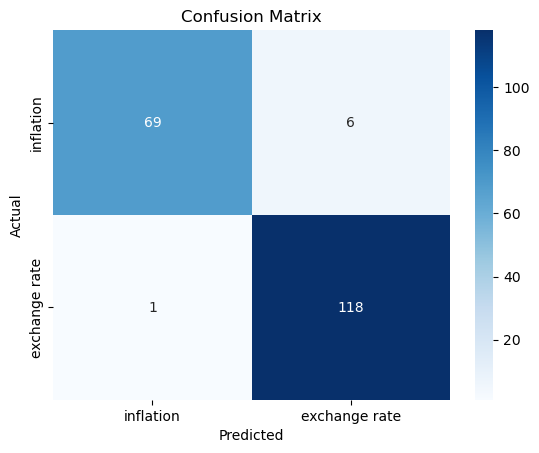

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['inflation', 'exchange rate'], yticklabels=['inflation', 'exchange rate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


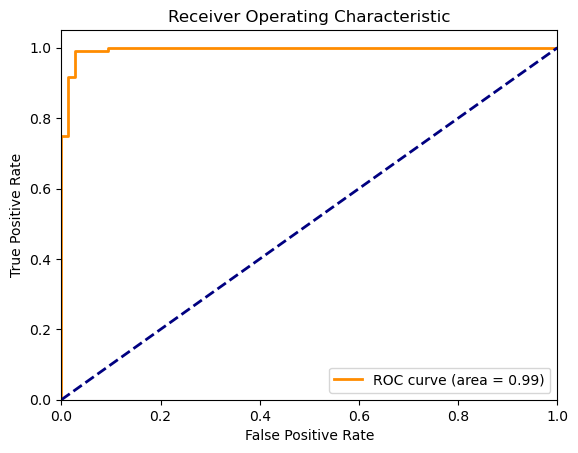

In [14]:
# ROC Curve
y_test_encoded = [0 if label == 'exchange rate' else 1 for label in y_test]
y_scores = model.predict_proba(X_test_vectorized)[:, 1]
fpr, tpr, _ = roc_curve(y_test_encoded, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Prediction of 'New.sentences.csv'

In [17]:
# Load the new data file
new_file_path = 'New sentences.csv'  # Adjust the path as needed
new_data = pd.read_csv(new_file_path, encoding='latin1')
new_sentences = new_data['New sentence'].values

# Process the new sentences
new_sentences_processed = [" ".join(tokenizer.tokenize(text)) for text in new_sentences]

new_sentences_vectorized = vectorizer.transform(new_sentences_processed)

# Make predictions on the new sentences
new_predictions = model.predict(new_sentences_vectorized)

# Create a DataFrame to display results
results = pd.DataFrame({'New Sentence': new_sentences, 'Prediction': new_predictions})

# Display the results
print(results)

                                         New Sentence     Prediction
0   The finances of central banks  is a topic of r...      inflation
1   Inflation dynamics are closely monitored, and ...      inflation
2   The opposition party accuses the ruling admini...      inflation
3     Our Proprietary Moisture Management technology.      inflation
4   The cat lazily stretched out on the sun-warmed...  exchange rate
5   Central banks intervened in the FX market to c...      inflation
6   Grassroots activism is reshaping the political...      inflation
7   We document the rise of China in offshore capi...      inflation
8   Communication strategies aim to clarify the ce...  exchange rate
9   Political gamesmanship, financial crises, and ...      inflation
10  The incumbent president faces mounting scrutin...      inflation
11  The aroma of freshly brewed coffee filled the ...      inflation
12  Stars shimmered like diamonds against the velv...      inflation
13  A gentle breeze rustled the le